# Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is binary in nature and calculates the probability that an observed sample belongs to one of the two classes.

Unlike linear regression that outputs a continuous value, logistic regression outputs probabilities. If the probability is greater than or equal to threshold (usually 0.5), the event is predicted to be from first class, otherwise from the second class.

Logistic regression uses the sigmoid function to map predictions to probabilities, which outputs a value between 0 and 1, which is then interpreted as a probability. The function is defined as:

              1
    σ(z) = ---------
            1 + e^(-z)

where, z is the input to the function, often a linear combination of input features and weights (z = w0 + w1x1 + w2x2 + ... + wnxn)

When z is a large positive number, e^(−z) approaches zero, and computing e^(z) can lead to an overflow error because the result can exceeds the range that can be represented in floating-point numbers.

We can modify the sigmoid function to check for large values of z and directly set the output to nearly 0 or 1, depending on the sign of z, to avoid computing the exponential of extreme values. Thus tackling the issue of overflow. 

Model Training (Estimation of Parameters), The parameters (weights) of the logistic regression model are estimated such that they maximize the likelihood of the observed data. This process, known as Maximum Likelihood Estimation (MLE), adjusts the weights to predict probabilities as close as possible to the actual class (0 or 1).

Cost Function (Log Loss): Logistic regression uses a cost function called log loss to measure the error between the predicted probabilities and the actual class labels. The cost function for logistic regression is given by:

               1  m 
    J(w) =  - --- ∑   [yi*log(pi) + (1 - yi)*log(1-pi)] 
               m  i=1

where, m is the number of observations, yi is the actual class label, and pi is the predicted probability of the observatioin belongng to the first class.

If and when we pass a value of 0 to the logarithm function in the cost computation we may encounter an error of division by zero, in the context of logistic regression, this happens if the prediction pi is exactly 0 or 1, which makes log(𝑝) or log(1-𝑝) undefined.

This can be avoided by adding a small constant (like 1e−8) to the input of the logarithm to avoid taking the log of zero.

The weights are optimized using techniques like Gradient Descent. This iterative algorithm repeatedly adjusts the weights in order to minimize the cost function. Each iteration updates the weights in the opposite direction of the gradient of the cost function with respect to the weights.

After training, the logistic regression model uses the learned weights to make predictions on new data. Predictions involve calculating the probability that a given input belongs to the first class. If the probability is greater than the threshold, the model predicts the label for the first class; otherwise, it predicts the label for the second class.

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 

In [4]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.cost_history = []  # Initialize cost history to track cost during training
    
    # Sigmoid function maps any real value into the interval [0, 1], which can be interpreted as a probability.
    # i.e. used to map predictions to probabilities.
    def sigmoid(self, z):
        # By clipping the input to the sigmoid function between -500 and 500, we prevent Python's exp function from trying to compute values 
        # that are too large to handle, which prevents overflow errors.
        # i.e. Stabilizing the sigmoid function to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
        
    # We are using the log-likelihood (which we are computing in this function) cost function in logistic regression, which measures the performance of our classification model 
    # i.e. how good our model's predictions are compared to the actual classifications.
    def compute_cost(self, X, y):
        m = len(y)
        predictions = self.sigmoid(np.dot(X, self.weights))
        # Adding a small constant to predictions inside the log
        # Adding a tiny positive number (epsilon) to the inputs of the log function prevents it from ever receiving a 0, 
        # which may cause the divide-by-zero error.
        epsilon = 1e-8
        error = (-y * np.log(predictions + epsilon)) - ((1 - y) * np.log(1 - predictions + epsilon))
        cost = np.mean(error)
        return cost

    # The fit method initializes the weights and performs gradient descent to learn the model's weights based on the training data.
    # Gradient Descent is the optimization algorithm used to minimize the cost function by updating the weights.
    def fit(self, X, y):
        m = len(y)
        self.weights = np.zeros(X.shape[1])  # Initialize weights with zero values

        for i in range(self.iterations):
            predictions = self.sigmoid(np.dot(X, self.weights))
            # Update weights with gradient
            gradient = np.dot(X.T, (predictions - y)) / m
            self.weights -= self.learning_rate * gradient
            # Save the cost every 100 iterations            
            if i % 100 == 0:
                cost = self.compute_cost(X, y)
                self.cost_history.append(cost)
    
    # The predict function converts the logistic model's probability outputs to class labels (0 or 1) based on a threshold, typically 0.5.
    def predict(self, X):
        probabilities = self.sigmoid(np.dot(X, self.weights))
        return np.array([1 if x >= 0.5 else 0 for x in probabilities])

#### Loading the dataset either directly from the online repository (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) or from the local storage.

In [6]:
# Fetching the data from the local storage 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets

# # Loading the data from the local storage
# data = pd.read_csv('wdbcdata.csv')

# # Drop the 'ID' column as it will be redundant. Also, ensure 'Diagnosis' is not dropped if it's the target variable
# X = data.drop(['ID', 'Diagnosis'], axis=1)

# # Extract the 'Diagnosis' column as the target variable
# y = data['Diagnosis']

In [7]:
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


In [8]:
# This step is not needed if loading the data for local storage
# Converting the y or the target variable to a 1-D array
y = y['Diagnosis']
y.shape

(569,)

In [9]:
# Converting 'M' and 'B' present in the 'Diagnosis to 0 and 1 respectively
for i in range(len(y)):
    if y[i] == 'M':
        y[i] = 0
    else:
        y[i] = 1

C:\Users\Harsh Sharma\AppData\Local\Temp\ipykernel_10688\1360196524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 0
C:\Users\Harsh Sharma\AppData\Local\Temp\ipykernel_10688\1360196524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = 1


In [10]:
# Checkinng the datatypes for the features and target variable
print(y.info())
print(X.info())

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: Diagnosis
Non-Null Count  Dtype 
--------------  ----- 
569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 1

In [11]:
# Covertinig y from an object datatye to a float datatype for our model
y = y.astype(float)

# Confirming the type
print(y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: Diagnosis
Non-Null Count  Dtype  
--------------  -----  
569 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB
None


In [12]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [13]:
# Creating an instance of the classification model LogisticRegression
model = LogisticRegression(learning_rate=0.1, iterations=500)

# Fitting the model to the data
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

In [14]:
# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


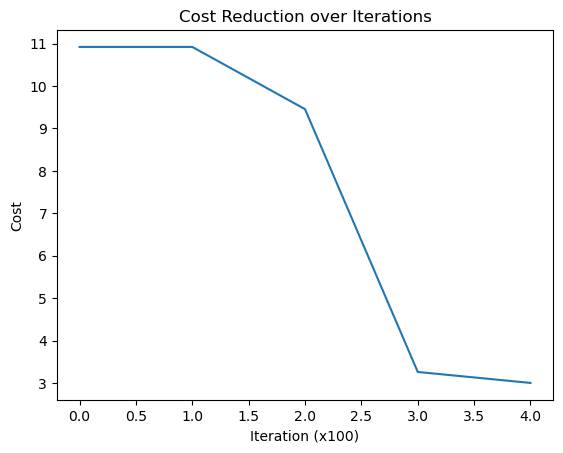

In [15]:
# Plotting the cost history
plt.plot(model.cost_history)
plt.title('Cost Reduction over Iterations')
plt.xlabel('Iteration (x100)')
plt.ylabel('Cost')
plt.show()